In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_excel
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:


import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
filenya= files.upload()

Saving BRIS.JK Baru.xlsx to BRIS.JK Baru (1).xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(filenya['BRIS.JK Baru.xlsx']))

In [ ]:
import io
df=pd.read_excel(io.BytesIO(filenya['BRIS.JK Baru.xlsx']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    586 non-null    datetime64[ns]
 1   Close   586 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.3 KB


In [ ]:
df.describe()

,Close
count,586.000000
mean,1770.138225
std,410.040206
min,1095.000000
25%,1480.000000
50%,1650.000000
75%,2070.000000
max,2880.000000


In [ ]:
df_close=df['Close'].replace('null',np.nan)
df_close

0      2810
1      2620
2      2440
3      2270
4      2610
       ... 
581    1655
582    1660
583    1650
584    1640
585    1640
Name: Close, Length: 586, dtype: int64

In [ ]:
df_close=df.replace(np.nan,df_close.mean)

In [ ]:
df_close

,Date,Close
0,2021-01-27,2810
1,2021-01-28,2620
2,2021-01-29,2440
3,2021-02-01,2270
4,2021-02-02,2610
...,...,...
581,2023-06-15,1655
582,2023-06-16,1660
583,2023-06-19,1650
584,2023-06-20,1640


In [ ]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    586 non-null    datetime64[ns]
 1   Close   586 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.3 KB


In [ ]:
df_close.shape

(586, 2)

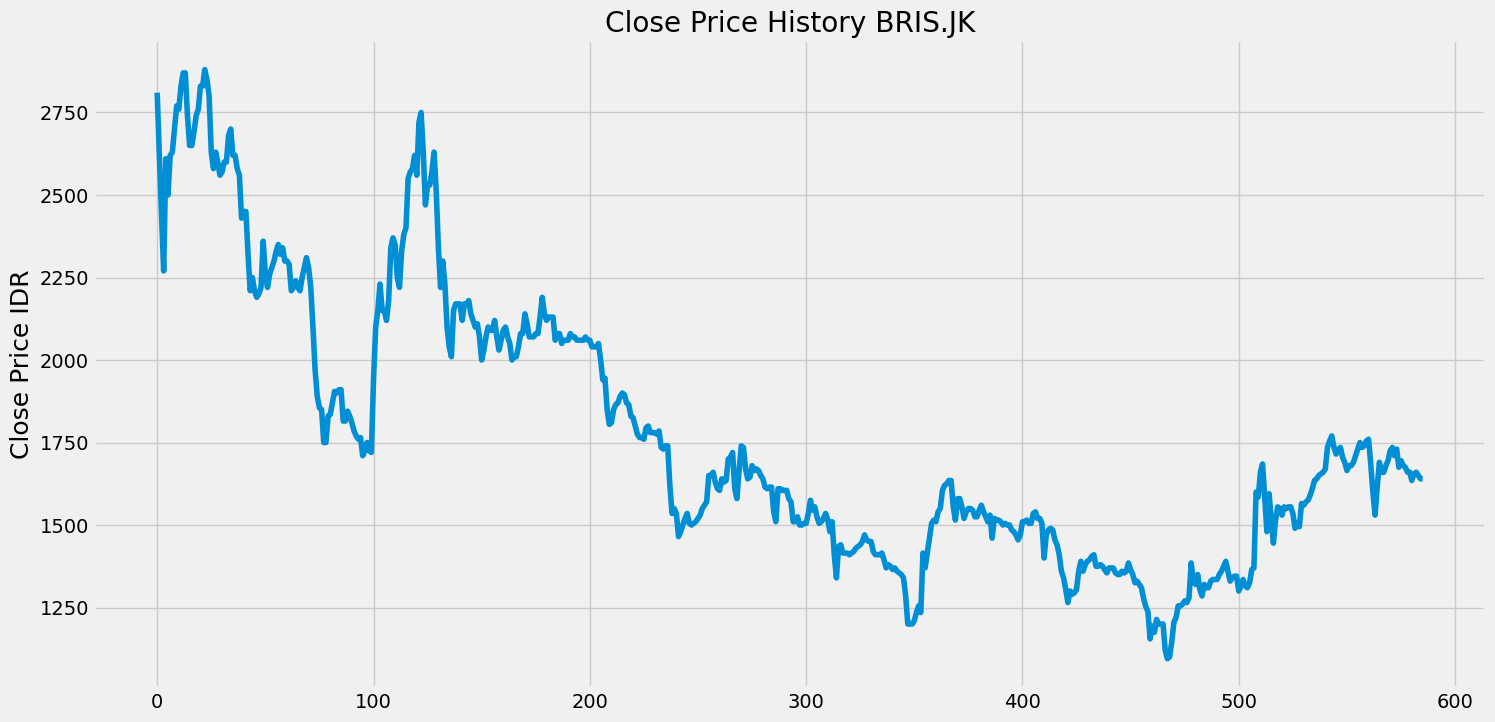

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History BRIS.JK')
plt.plot(df['Close'])
plt.ylabel('Close Price IDR',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df_close.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get/Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

469

In [ ]:
testing_data_len = math.ceil( len(dataset) *.2)
testing_data_len

118

In [ ]:
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.96078431],
       [0.85434174],
       [0.7535014 ],
       [0.65826331],
       [0.8487395 ],
       [0.78711485],
       [0.85434174],
       [0.85994398],
       [0.89915966],
       [0.93837535],
       [0.93277311],
       [0.9719888 ],
       [0.99439776],
       [0.99439776],
       [0.92156863],
       [0.87114846],
       [0.87114846],
       [0.89355742],
       [0.92156863],
       [0.93277311],
       [0.9719888 ],
       [0.9719888 ],
       [1.        ],
       [0.98319328],
       [0.95518207],
       [0.85994398],
       [0.83193277],
       [0.85994398],
       [0.84313725],
       [0.82072829],
       [0.82633053],
       [0.84313725],
       [0.84313725],
       [0.88795518],
       [0.89915966],
       [0.85434174],
       [0.85434174],
       [0.83193277],
       [0.82072829],
       [0.74789916],
       [0.75910364],
       [0.75910364],
       [0.68627451],
       [0.62464986],
       [0.64705882],
       [0.62464986],
       [0.61344538],
       [0.619

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , : ]
#Split the data into x train and y train data sets
#x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train=[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape[0]

409

In [ ]:
x_train

array([[[0.96078431],
        [0.85434174],
        [0.7535014 ],
        ...,
        [0.68627451],
        [0.69747899],
        [0.67507003]],

       [[0.85434174],
        [0.7535014 ],
        [0.65826331],
        ...,
        [0.69747899],
        [0.67507003],
        [0.67507003]],

       [[0.7535014 ],
        [0.65826331],
        [0.8487395 ],
        ...,
        [0.67507003],
        [0.67507003],
        [0.66946779]],

       ...,

       [[0.24929972],
        [0.23809524],
        [0.23809524],
        ...,
        [0.05882353],
        [0.05882353],
        [0.05882353]],

       [[0.23809524],
        [0.23809524],
        [0.22969188],
        ...,
        [0.05882353],
        [0.05882353],
        [0.0140056 ]],

       [[0.23809524],
        [0.22969188],
        [0.17086835],
        ...,
        [0.05882353],
        [0.0140056 ],
        [0.        ]]])

In [ ]:
y_train

array([0.67507003, 0.66946779, 0.62464986, 0.6302521 , 0.64145658,
       0.6302521 , 0.62464986, 0.64705882, 0.66386555, 0.68067227,
       0.66386555, 0.6302521 , 0.56302521, 0.49019608, 0.44537815,
       0.42577031, 0.42296919, 0.36694678, 0.36694678, 0.41176471,
       0.41456583, 0.43417367, 0.45378151, 0.45098039, 0.45658263,
       0.45658263, 0.40336134, 0.40336134, 0.42016807, 0.41176471,
       0.40056022, 0.38655462, 0.37815126, 0.37254902, 0.37535014,
       0.34453782, 0.35294118, 0.36694678, 0.35294118, 0.35014006,
       0.47338936, 0.56302521, 0.59103641, 0.63585434, 0.59103641,
       0.59103641, 0.57422969, 0.60784314, 0.69747899, 0.71428571,
       0.70308123, 0.64705882, 0.6302521 , 0.69187675, 0.71988796,
       0.73109244, 0.81512605, 0.82633053, 0.83193277, 0.85434174,
       0.82072829, 0.91036415, 0.92717087, 0.85994398, 0.77030812,
       0.80392157, 0.80392157, 0.82633053, 0.85994398, 0.79271709,
       0.69747899, 0.6302521 , 0.67507003, 0.63585434, 0.56302

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=10, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 7s 57ms/step - loss: 0.1148
Epoch 2/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0644
Epoch 3/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0263
Epoch 4/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0117
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0161
Epoch 6/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0127
Epoch 7/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0093
Epoch 8/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0097
Epoch 9/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0093
Epoch 10/100
5/5 [==============================] - 0s 54ms/step - loss: 0.0081
Epoch 11/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0074
Epoch 12/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0072
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 14ms/step


array([[0.04855784],
       [0.043126  ],
       [0.0410779 ],
       [0.04161805],
       [0.04490351],
       [0.04965566],
       [0.0552369 ],
       [0.06135357],
       [0.06724663],
       [0.0731862 ],
       [0.0825122 ],
       [0.09115742],
       [0.09864404],
       [0.10608234],
       [0.11124292],
       [0.11403295],
       [0.11652084],
       [0.11813787],
       [0.11912132],
       [0.12038456],
       [0.12184974],
       [0.12332533],
       [0.12471306],
       [0.12653321],
       [0.1288411 ],
       [0.13186017],
       [0.1356758 ],
       [0.13853188],
       [0.13955753],
       [0.13988662],
       [0.13990358],
       [0.1396952 ],
       [0.13759142],
       [0.13521196],
       [0.1335154 ],
       [0.13148779],
       [0.12927492],
       [0.1276891 ],
       [0.1280835 ],
       [0.12973829],
       [0.14114997],
       [0.15670606],
       [0.17732124],
       [0.20085707],
       [0.22047701],
       [0.23226283],
       [0.2439891 ],
       [0.250

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1181.6758],
       [1171.98  ],
       [1168.324 ],
       [1169.2882],
       [1175.1528],
       [1183.6354],
       [1193.5979],
       [1204.5161],
       [1215.0353],
       [1225.6373],
       [1242.2843],
       [1257.716 ],
       [1271.0796],
       [1284.3569],
       [1293.5686],
       [1298.5488],
       [1302.9897],
       [1305.8761],
       [1307.6316],
       [1309.8864],
       [1312.5018],
       [1315.1356],
       [1317.6129],
       [1320.8618],
       [1324.9814],
       [1330.3704],
       [1337.1813],
       [1342.2794],
       [1344.1101],
       [1344.6976],
       [1344.7279],
       [1344.356 ],
       [1340.6007],
       [1336.3534],
       [1333.325 ],
       [1329.7057],
       [1325.7557],
       [1322.925 ],
       [1323.629 ],
       [1326.5829],
       [1346.9526],
       [1374.7203],
       [1411.5184],
       [1453.5299],
       [1488.5515],
       [1509.5891],
       [1530.5205],
       [1542.788 ],
       [1543.4761],
       [1543.1083],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

322.0766309683575

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

1.4561322612039634e-149

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

73.14218777266483

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=10, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 6s 93ms/step - loss: 0.1094
Epoch 2/500
5/5 [==============================] - 0s 58ms/step - loss: 0.0673
Epoch 3/500
5/5 [==============================] - 0s 58ms/step - loss: 0.0347
Epoch 4/500
5/5 [==============================] - 0s 61ms/step - loss: 0.0134
Epoch 5/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0092
Epoch 6/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0125
Epoch 7/500
5/5 [==============================] - 0s 66ms/step - loss: 0.0106
Epoch 8/500
5/5 [==============================] - 0s 62ms/step - loss: 0.0076
Epoch 9/500
5/5 [==============================] - 0s 67ms/step - loss: 0.0072
Epoch 10/500
5/5 [==============================] - 0s 61ms/step - loss: 0.0072
Epoch 11/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0064
Epoch 12/500
5/5 [==============================] - 0s 60ms/step - loss: 0.0057
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 12ms/step


array([[0.01341655],
       [0.02081208],
       [0.04100484],
       [0.05772299],
       [0.07614623],
       [0.08642531],
       [0.09239692],
       [0.09708662],
       [0.09744442],
       [0.10051522],
       [0.12947533],
       [0.13186502],
       [0.12850598],
       [0.1332214 ],
       [0.12275017],
       [0.11020044],
       [0.112354  ],
       [0.11125591],
       [0.1105951 ],
       [0.1156674 ],
       [0.11984039],
       [0.12175615],
       [0.12222136],
       [0.1261981 ],
       [0.13091812],
       [0.13746372],
       [0.14502096],
       [0.1397362 ],
       [0.12713861],
       [0.12285756],
       [0.12248415],
       [0.1228755 ],
       [0.11037576],
       [0.10809003],
       [0.11340008],
       [0.11120103],
       [0.10871198],
       [0.11187947],
       [0.12555942],
       [0.13480234],
       [0.20899087],
       [0.24638465],
       [0.28748736],
       [0.3138529 ],
       [0.28854695],
       [0.23518226],
       [0.24618003],
       [0.228

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1118.9485],
       [1132.1495],
       [1168.1937],
       [1198.0355],
       [1230.921 ],
       [1249.2692],
       [1259.9286],
       [1268.2997],
       [1268.9384],
       [1274.4197],
       [1326.1134],
       [1330.3792],
       [1324.3832],
       [1332.8002],
       [1314.1091],
       [1291.7078],
       [1295.5519],
       [1293.5918],
       [1292.4122],
       [1301.4663],
       [1308.9152],
       [1312.3347],
       [1313.1652],
       [1320.2635],
       [1328.6888],
       [1340.3727],
       [1353.8624],
       [1344.4291],
       [1321.9425],
       [1314.3007],
       [1313.6343],
       [1314.3328],
       [1292.0208],
       [1287.9407],
       [1297.4191],
       [1293.4938],
       [1289.0509],
       [1294.7048],
       [1319.1235],
       [1335.6222],
       [1468.0487],
       [1534.7966],
       [1608.1649],
       [1655.2275],
       [1610.0563],
       [1514.8003],
       [1534.4314],
       [1503.2424],
       [1444.4482],
       [1460.6707],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

606.578911682314

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

3.951558028628792e-161

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

51.91410594765729

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=10, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 5s 51ms/step - loss: 0.0615
Epoch 2/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0266
Epoch 3/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0089
Epoch 4/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0107
Epoch 5/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.0113
Epoch 6/1000
5/5 [==============================] - 0s 55ms/step - loss: 0.0074
Epoch 7/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.0068
Epoch 8/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.0071
Epoch 9/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.0063
Epoch 10/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.0055
Epoch 11/1000
5/5 [==============================] - 0s 63ms/step - loss: 0.0054
Epoch 12/1000
5/5 [==============================] - 0s 56ms/step - loss: 0.0051
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 13ms/step


array([[0.00625738],
       [0.02405573],
       [0.05486752],
       [0.07196325],
       [0.09100541],
       [0.0958231 ],
       [0.09738588],
       [0.10043589],
       [0.09782682],
       [0.10243087],
       [0.14981538],
       [0.13694449],
       [0.12662472],
       [0.13676128],
       [0.1169543 ],
       [0.10285319],
       [0.11619572],
       [0.11445877],
       [0.11433481],
       [0.12381928],
       [0.12805462],
       [0.12873645],
       [0.12860094],
       [0.13562854],
       [0.14156447],
       [0.14979534],
       [0.15831837],
       [0.14406817],
       [0.12664165],
       [0.12904738],
       [0.13194296],
       [0.13280283],
       [0.11081708],
       [0.11560743],
       [0.12628776],
       [0.11851937],
       [0.11535379],
       [0.12235851],
       [0.14340207],
       [0.14933053],
       [0.26723444],
       [0.27696937],
       [0.3165296 ],
       [0.33000094],
       [0.26860192],
       [0.20553392],
       [0.2743564 ],
       [0.225

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1106.1694],
       [1137.9395],
       [1192.9386],
       [1223.4545],
       [1257.4447],
       [1266.0442],
       [1268.8339],
       [1274.2781],
       [1269.6208],
       [1277.8391],
       [1362.4205],
       [1339.4459],
       [1321.0251],
       [1339.1189],
       [1303.7634],
       [1278.593 ],
       [1302.4093],
       [1299.3088],
       [1299.0876],
       [1316.0173],
       [1323.5775],
       [1324.7946],
       [1324.5526],
       [1337.0969],
       [1347.6925],
       [1362.3846],
       [1377.5983],
       [1352.1616],
       [1321.0553],
       [1325.3495],
       [1330.5182],
       [1332.053 ],
       [1292.8085],
       [1301.3593],
       [1320.4237],
       [1306.5571],
       [1300.9065],
       [1313.4099],
       [1350.9727],
       [1361.5549],
       [1572.0135],
       [1589.3904],
       [1660.0054],
       [1684.0518],
       [1574.4545],
       [1461.878 ],
       [1584.7262],
       [1497.3547],
       [1427.5859],
       [1504.0282],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

127.68259146196398

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

3.5578361610628573e-172

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.0218157533234

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 5s 65ms/step - loss: 0.1405
Epoch 2/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0465
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0141
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0214
Epoch 5/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0112
Epoch 6/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0099
Epoch 7/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0103
Epoch 8/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0082
Epoch 9/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0071
Epoch 10/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0069
Epoch 11/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0061
Epoch 12/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0057
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 23ms/step


array([[0.03893524],
       [0.03351381],
       [0.03238463],
       [0.03434628],
       [0.03941504],
       [0.04585696],
       [0.05283067],
       [0.06003383],
       [0.06658289],
       [0.07293411],
       [0.08352823],
       [0.09301237],
       [0.10069338],
       [0.10817949],
       [0.112698  ],
       [0.1142256 ],
       [0.11561912],
       [0.1162216 ],
       [0.11629862],
       [0.11701438],
       [0.11821788],
       [0.11957892],
       [0.12091737],
       [0.12287768],
       [0.12550281],
       [0.12902655],
       [0.13350677],
       [0.13663901],
       [0.13732019],
       [0.13713436],
       [0.13669723],
       [0.13613187],
       [0.13329303],
       [0.1302575 ],
       [0.12831987],
       [0.12612982],
       [0.12378547],
       [0.1223098 ],
       [0.1233938 ],
       [0.12601922],
       [0.14094442],
       [0.16068776],
       [0.18589044],
       [0.21369162],
       [0.23515381],
       [0.24548467],
       [0.2553948 ],
       [0.259

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1164.4994],
       [1154.8221],
       [1152.8065],
       [1156.3081],
       [1165.3558],
       [1176.8547],
       [1189.3027],
       [1202.1604],
       [1213.8505],
       [1225.1874],
       [1244.0979],
       [1261.0271],
       [1274.7377],
       [1288.1003],
       [1296.1659],
       [1298.8927],
       [1301.3801],
       [1302.4554],
       [1302.593 ],
       [1303.8706],
       [1306.0189],
       [1308.4484],
       [1310.8374],
       [1314.3367],
       [1319.0225],
       [1325.3124],
       [1333.3097],
       [1338.9006],
       [1340.1166],
       [1339.7848],
       [1339.0046],
       [1337.9954],
       [1332.9281],
       [1327.5096],
       [1324.051 ],
       [1320.1417],
       [1315.957 ],
       [1313.323 ],
       [1315.2579],
       [1319.9443],
       [1346.5858],
       [1381.8276],
       [1426.8145],
       [1476.4396],
       [1514.7495],
       [1533.1902],
       [1550.8796],
       [1557.9485],
       [1550.8112],
       [1543.5513],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

660.1237322652486

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

4.661425656719882e-149

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

72.08764236807546

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 5s 63ms/step - loss: 0.1217
Epoch 2/500
5/5 [==============================] - 0s 62ms/step - loss: 0.0445
Epoch 3/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0135
Epoch 4/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0202
Epoch 5/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0115
Epoch 6/500
5/5 [==============================] - 0s 60ms/step - loss: 0.0104
Epoch 7/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0106
Epoch 8/500
5/5 [==============================] - 0s 60ms/step - loss: 0.0083
Epoch 9/500
5/5 [==============================] - 0s 60ms/step - loss: 0.0072
Epoch 10/500
5/5 [==============================] - 0s 61ms/step - loss: 0.0070
Epoch 11/500
5/5 [==============================] - 0s 62ms/step - loss: 0.0061
Epoch 12/500
5/5 [==============================] - 0s 59ms/step - loss: 0.0058
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 19ms/step


array([[0.02483084],
       [0.03450661],
       [0.05703046],
       [0.07347678],
       [0.09182602],
       [0.10057062],
       [0.1053229 ],
       [0.10941443],
       [0.10880598],
       [0.11192036],
       [0.14475004],
       [0.1436484 ],
       [0.1386494 ],
       [0.1445287 ],
       [0.13256799],
       [0.11984263],
       [0.12441017],
       [0.12375323],
       [0.12357931],
       [0.12995775],
       [0.13476507],
       [0.13702175],
       [0.13791698],
       [0.14292088],
       [0.14833246],
       [0.15551393],
       [0.16351807],
       [0.1569993 ],
       [0.14357765],
       [0.14028852],
       [0.1405018 ],
       [0.14084414],
       [0.12664722],
       [0.12509334],
       [0.13130805],
       [0.12820286],
       [0.12538472],
       [0.12912534],
       [0.14406894],
       [0.15285957],
       [0.23453452],
       [0.2680792 ],
       [0.3087437 ],
       [0.3344802 ],
       [0.30603954],
       [0.25151023],
       [0.2697001 ],
       [0.249

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1139.323 ],
       [1156.5942],
       [1196.7993],
       [1226.156 ],
       [1258.9095],
       [1274.5186],
       [1283.0015],
       [1290.3047],
       [1289.2186],
       [1294.7778],
       [1353.3788],
       [1351.4124],
       [1342.4893],
       [1352.9838],
       [1331.6338],
       [1308.9191],
       [1317.0721],
       [1315.8995],
       [1315.589 ],
       [1326.9746],
       [1335.5557],
       [1339.5839],
       [1341.1819],
       [1350.1138],
       [1359.7734],
       [1372.5923],
       [1386.8798],
       [1375.2438],
       [1351.2861],
       [1345.4149],
       [1345.7958],
       [1346.4067],
       [1321.0653],
       [1318.2916],
       [1329.3849],
       [1323.8422],
       [1318.8118],
       [1325.4886],
       [1352.163 ],
       [1367.8544],
       [1513.6442],
       [1573.5214],
       [1646.1074],
       [1692.0471],
       [1641.2805],
       [1543.9458],
       [1576.4148],
       [1540.1729],
       [1474.6646],
       [1495.182 ],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

37.91229977036739

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

9.057227767168005e-172

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

46.02038463827418

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=20, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 5s 63ms/step - loss: 0.1575
Epoch 2/1000
5/5 [==============================] - 0s 65ms/step - loss: 0.0679
Epoch 3/1000
5/5 [==============================] - 0s 61ms/step - loss: 0.0191
Epoch 4/1000
5/5 [==============================] - 0s 59ms/step - loss: 0.0183
Epoch 5/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0166
Epoch 6/1000
5/5 [==============================] - 0s 64ms/step - loss: 0.0096
Epoch 7/1000
5/5 [==============================] - 0s 64ms/step - loss: 0.0100
Epoch 8/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0097
Epoch 9/1000
5/5 [==============================] - 0s 61ms/step - loss: 0.0077
Epoch 10/1000
5/5 [==============================] - 0s 58ms/step - loss: 0.0069
Epoch 11/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.0064
Epoch 12/1000
5/5 [==============================] - 0s 65ms/step - loss: 0.0057
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 19ms/step


array([[0.02243404],
       [0.03844636],
       [0.06560531],
       [0.07948694],
       [0.09884984],
       [0.10437071],
       [0.10829122],
       [0.11251491],
       [0.11046388],
       [0.11493706],
       [0.15725045],
       [0.14438356],
       [0.1393377 ],
       [0.14885248],
       [0.13069388],
       [0.11799113],
       [0.1276302 ],
       [0.12409032],
       [0.12383965],
       [0.13205566],
       [0.13601546],
       [0.13755783],
       [0.13822514],
       [0.1447802 ],
       [0.15025516],
       [0.15810432],
       [0.1663978 ],
       [0.155033  ],
       [0.13992792],
       [0.14024219],
       [0.14075404],
       [0.14052758],
       [0.12073242],
       [0.12414566],
       [0.13224387],
       [0.12521312],
       [0.12293664],
       [0.12911667],
       [0.14795601],
       [0.15407303],
       [0.26178885],
       [0.27412397],
       [0.3205793 ],
       [0.34129664],
       [0.29636812],
       [0.23850435],
       [0.28461885],
       [0.242

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1135.0447],
       [1163.6268],
       [1212.1055],
       [1236.8842],
       [1271.447 ],
       [1281.3016],
       [1288.2998],
       [1295.8391],
       [1292.178 ],
       [1300.1626],
       [1375.692 ],
       [1352.7247],
       [1343.7178],
       [1360.7017],
       [1328.2886],
       [1305.6141],
       [1322.82  ],
       [1316.5012],
       [1316.0537],
       [1330.7194],
       [1337.7876],
       [1340.5408],
       [1341.7319],
       [1353.4326],
       [1363.2054],
       [1377.2162],
       [1392.02  ],
       [1371.7339],
       [1344.7714],
       [1345.3323],
       [1346.246 ],
       [1345.8417],
       [1310.5073],
       [1316.6   ],
       [1331.0553],
       [1318.5054],
       [1314.4419],
       [1325.4733],
       [1359.1016],
       [1370.0204],
       [1562.2931],
       [1584.3113],
       [1667.2341],
       [1704.2145],
       [1624.0171],
       [1520.7303],
       [1603.0447],
       [1527.6803],
       [1455.8013],
       [1507.8785],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

10.16752053656169

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

7.612753231583189e-176

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

42.49169278000901

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=30, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 4s 68ms/step - loss: 0.1213
Epoch 2/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0270
Epoch 3/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0148
Epoch 4/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0136
Epoch 5/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0072
Epoch 6/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0089
Epoch 7/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0072
Epoch 8/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0057
Epoch 9/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0059
Epoch 10/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0051
Epoch 11/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0049
Epoch 12/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0047
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 16ms/step


array([[0.03786321],
       [0.03295915],
       [0.03300957],
       [0.03659168],
       [0.04366782],
       [0.05211079],
       [0.06084789],
       [0.06945987],
       [0.07690509],
       [0.0837495 ],
       [0.09522869],
       [0.10519646],
       [0.11287151],
       [0.1201158 ],
       [0.12375906],
       [0.12385833],
       [0.12382236],
       [0.12300023],
       [0.12178703],
       [0.12155913],
       [0.12213603],
       [0.12310125],
       [0.12419008],
       [0.12609656],
       [0.12882519],
       [0.13261473],
       [0.13749923],
       [0.14075033],
       [0.14106087],
       [0.14029123],
       [0.13920574],
       [0.1380182 ],
       [0.13427062],
       [0.13043419],
       [0.12801734],
       [0.12545277],
       [0.12285505],
       [0.12137949],
       [0.12295969],
       [0.12635434],
       [0.14417471],
       [0.16752835],
       [0.19715936],
       [0.22946762],
       [0.2535218 ],
       [0.26338693],
       [0.27206615],
       [0.273

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1162.5858],
       [1153.832 ],
       [1153.922 ],
       [1160.3162],
       [1172.947 ],
       [1188.0178],
       [1203.6135],
       [1218.9858],
       [1232.2756],
       [1244.4928],
       [1264.9833],
       [1282.7756],
       [1296.4756],
       [1309.4066],
       [1315.9099],
       [1316.0872],
       [1316.023 ],
       [1314.5554],
       [1312.3899],
       [1311.983 ],
       [1313.0128],
       [1314.7357],
       [1316.6792],
       [1320.0824],
       [1324.953 ],
       [1331.7173],
       [1340.4362],
       [1346.2393],
       [1346.7936],
       [1345.4198],
       [1343.4822],
       [1341.3625],
       [1334.6731],
       [1327.825 ],
       [1323.511 ],
       [1318.9332],
       [1314.2963],
       [1311.6625],
       [1314.483 ],
       [1320.5425],
       [1352.3519],
       [1394.0381],
       [1446.9294],
       [1504.5996],
       [1547.5365],
       [1565.1456],
       [1580.6381],
       [1582.5988],
       [1567.6758],
       [1553.433 ],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

489.31043144474796

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

6.372478707767717e-151

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

69.40217849645154

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=30, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 6s 74ms/step - loss: 0.1302
Epoch 2/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0308
Epoch 3/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0227
Epoch 4/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0148
Epoch 5/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0113
Epoch 6/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0123
Epoch 7/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0094
Epoch 8/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0082
Epoch 9/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0077
Epoch 10/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0066
Epoch 11/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0063
Epoch 12/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0059
Epoch 13/500
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 14ms/step


array([[0.00837134],
       [0.02331229],
       [0.05188046],
       [0.06969397],
       [0.08988655],
       [0.09687378],
       [0.10019237],
       [0.10388675],
       [0.10194661],
       [0.10611459],
       [0.14926086],
       [0.14025295],
       [0.13184357],
       [0.14018276],
       [0.12264263],
       [0.10840253],
       [0.11840335],
       [0.11726834],
       [0.11719954],
       [0.12568188],
       [0.13036093],
       [0.13169774],
       [0.13188636],
       [0.13816582],
       [0.14407754],
       [0.1520614 ],
       [0.1605223 ],
       [0.14904712],
       [0.13232169],
       [0.1319863 ],
       [0.13412896],
       [0.13501601],
       [0.11589843],
       [0.1175326 ],
       [0.12686062],
       [0.12126991],
       [0.11791877],
       [0.12356658],
       [0.1426296 ],
       [0.15026505],
       [0.25557923],
       [0.27640685],
       [0.31463352],
       [0.33089742],
       [0.27946663],
       [0.21587591],
       [0.26312867],
       [0.232

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1109.9427],
       [1136.6124],
       [1187.6066],
       [1219.4037],
       [1255.4475],
       [1267.9197],
       [1273.8434],
       [1280.4379],
       [1276.9747],
       [1284.4146],
       [1361.4305],
       [1345.3516],
       [1330.3408],
       [1345.2262],
       [1313.917 ],
       [1288.4985],
       [1306.35  ],
       [1304.324 ],
       [1304.2012],
       [1319.3422],
       [1327.6942],
       [1330.0804],
       [1330.4172],
       [1341.626 ],
       [1352.1785],
       [1366.4297],
       [1381.5323],
       [1361.0491],
       [1331.1942],
       [1330.5955],
       [1334.4202],
       [1336.0035],
       [1301.8788],
       [1304.7957],
       [1321.4463],
       [1311.4668],
       [1305.485 ],
       [1315.5664],
       [1349.5939],
       [1363.2231],
       [1551.209 ],
       [1588.3862],
       [1656.6208],
       [1685.6519],
       [1593.848 ],
       [1480.3385],
       [1564.6847],
       [1510.5114],
       [1436.2517],
       [1487.8522],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

197.35509019501416

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

3.248513684927553e-170

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

44.03822356790297

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=30, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=30, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 5s 77ms/step - loss: 0.0949
Epoch 2/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0167
Epoch 3/1000
5/5 [==============================] - 0s 89ms/step - loss: 0.0211
Epoch 4/1000
5/5 [==============================] - 1s 111ms/step - loss: 0.0086
Epoch 5/1000
5/5 [==============================] - 1s 112ms/step - loss: 0.0106
Epoch 6/1000
5/5 [==============================] - 1s 117ms/step - loss: 0.0089
Epoch 7/1000
5/5 [==============================] - 1s 116ms/step - loss: 0.0068
Epoch 8/1000
5/5 [==============================] - 1s 123ms/step - loss: 0.0069
Epoch 9/1000
5/5 [==============================] - 0s 72ms/step - loss: 0.0059
Epoch 10/1000
5/5 [==============================] - 0s 74ms/step - loss: 0.0057
Epoch 11/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.0053
Epoch 12/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.0052
Epoch 13/1000
5/5 [=============

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 20ms/step


array([[0.00208415],
       [0.01134264],
       [0.03493234],
       [0.05122154],
       [0.06973592],
       [0.07876079],
       [0.08348031],
       [0.08735705],
       [0.08591599],
       [0.08754433],
       [0.11917232],
       [0.11786977],
       [0.11151895],
       [0.11614047],
       [0.10225232],
       [0.08700113],
       [0.08855041],
       [0.0842602 ],
       [0.07993996],
       [0.08230057],
       [0.08418792],
       [0.08423647],
       [0.08360346],
       [0.08745027],
       [0.09214436],
       [0.09893657],
       [0.10731149],
       [0.10222156],
       [0.09002864],
       [0.08665775],
       [0.08613598],
       [0.0854567 ],
       [0.07069763],
       [0.06723904],
       [0.07133495],
       [0.06737623],
       [0.06378786],
       [0.06669128],
       [0.08086044],
       [0.09069853],
       [0.1697038 ],
       [0.20860027],
       [0.25335154],
       [0.28397736],
       [0.26311362],
       [0.22154462],
       [0.25150865],
       [0.232

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1098.7202],
       [1115.2467],
       [1157.3542],
       [1186.4304],
       [1219.4786],
       [1235.588 ],
       [1244.0123],
       [1250.9324],
       [1248.3601],
       [1251.2666],
       [1307.7225],
       [1305.3975],
       [1294.0613],
       [1302.3107],
       [1277.5204],
       [1250.297 ],
       [1253.0625],
       [1245.4044],
       [1237.6929],
       [1241.9065],
       [1245.2755],
       [1245.362 ],
       [1244.2322],
       [1251.0988],
       [1259.4777],
       [1271.6018],
       [1286.551 ],
       [1277.4655],
       [1255.701 ],
       [1249.6841],
       [1248.7528],
       [1247.5402],
       [1221.1953],
       [1215.0216],
       [1222.3329],
       [1215.2666],
       [1208.8613],
       [1214.044 ],
       [1239.3359],
       [1256.8969],
       [1397.9213],
       [1467.3514],
       [1547.2325],
       [1601.8995],
       [1564.6578],
       [1490.4572],
       [1543.943 ],
       [1509.2208],
       [1448.4583],
       [1475.5022],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

1250.5465335406795

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

5.0699827000646805e-146

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

71.35821234930756

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=40, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=100)

Epoch 1/100
5/5 [==============================] - 5s 79ms/step - loss: 0.0947
Epoch 2/100
5/5 [==============================] - 0s 84ms/step - loss: 0.0148
Epoch 3/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0187
Epoch 4/100
5/5 [==============================] - 0s 85ms/step - loss: 0.0070
Epoch 5/100
5/5 [==============================] - 0s 79ms/step - loss: 0.0096
Epoch 6/100
5/5 [==============================] - 0s 79ms/step - loss: 0.0066
Epoch 7/100
5/5 [==============================] - 0s 82ms/step - loss: 0.0054
Epoch 8/100
5/5 [==============================] - 0s 78ms/step - loss: 0.0054
Epoch 9/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0045
Epoch 10/100
5/5 [==============================] - 0s 85ms/step - loss: 0.0043
Epoch 11/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0038
Epoch 12/100
5/5 [==============================] - 0s 83ms/step - loss: 0.0037
Epoch 13/100
5/5 [==============================]

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 24ms/step


array([[0.02758897],
       [0.02252155],
       [0.0242358 ],
       [0.03010708],
       [0.03981324],
       [0.05022386],
       [0.06005762],
       [0.06908063],
       [0.07615367],
       [0.08244761],
       [0.09542268],
       [0.10569181],
       [0.11260843],
       [0.11928038],
       [0.1213274 ],
       [0.11934883],
       [0.11839528],
       [0.11717179],
       [0.11599475],
       [0.11655304],
       [0.1182299 ],
       [0.12022842],
       [0.12212634],
       [0.1249148 ],
       [0.12852669],
       [0.13324173],
       [0.1390448 ],
       [0.14212334],
       [0.14111102],
       [0.13913137],
       [0.1372992 ],
       [0.13576223],
       [0.13097091],
       [0.12660202],
       [0.12456766],
       [0.12230288],
       [0.11991918],
       [0.11901227],
       [0.12208967],
       [0.12701471],
       [0.15116568],
       [0.18007435],
       [0.21444707],
       [0.24908401],
       [0.26943123],
       [0.27021077],
       [0.2725449 ],
       [0.267

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1144.2463],
       [1135.2009],
       [1138.2609],
       [1148.7412],
       [1166.0667],
       [1184.6495],
       [1202.2029],
       [1218.3088],
       [1230.9343],
       [1242.169 ],
       [1265.3295],
       [1283.6599],
       [1296.0061],
       [1307.9154],
       [1311.5695],
       [1308.0377],
       [1306.3356],
       [1304.1516],
       [1302.0507],
       [1303.0471],
       [1306.0404],
       [1309.6078],
       [1312.9956],
       [1317.9729],
       [1324.4202],
       [1332.8365],
       [1343.195 ],
       [1348.6902],
       [1346.8832],
       [1343.3495],
       [1340.0791],
       [1337.3356],
       [1328.7831],
       [1320.9846],
       [1317.3533],
       [1313.3105],
       [1309.0558],
       [1307.4369],
       [1312.93  ],
       [1321.7213],
       [1364.8308],
       [1416.4327],
       [1477.788 ],
       [1539.615 ],
       [1575.9348],
       [1577.3262],
       [1581.4927],
       [1572.3358],
       [1546.1676],
       [1527.913 ],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

614.1904017784187

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

2.6578537653754672e-152

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

66.46472320725833

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=40, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=500)

Epoch 1/500
5/5 [==============================] - 5s 82ms/step - loss: 0.0817
Epoch 2/500
5/5 [==============================] - 0s 83ms/step - loss: 0.0147
Epoch 3/500
5/5 [==============================] - 0s 82ms/step - loss: 0.0132
Epoch 4/500
5/5 [==============================] - 0s 83ms/step - loss: 0.0079
Epoch 5/500
5/5 [==============================] - 0s 83ms/step - loss: 0.0091
Epoch 6/500
5/5 [==============================] - 0s 81ms/step - loss: 0.0060
Epoch 7/500
5/5 [==============================] - 0s 82ms/step - loss: 0.0062
Epoch 8/500
5/5 [==============================] - 0s 86ms/step - loss: 0.0052
Epoch 9/500
5/5 [==============================] - 0s 80ms/step - loss: 0.0050
Epoch 10/500
5/5 [==============================] - 0s 81ms/step - loss: 0.0048
Epoch 11/500
5/5 [==============================] - 0s 83ms/step - loss: 0.0045
Epoch 12/500
5/5 [==============================] - 1s 132ms/step - loss: 0.0043
Epoch 13/500
5/5 [==============================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 20ms/step


array([[0.01212892],
       [0.02891437],
       [0.06129702],
       [0.08179975],
       [0.10273004],
       [0.10958084],
       [0.11204755],
       [0.11537268],
       [0.11312444],
       [0.11723276],
       [0.16296124],
       [0.15311125],
       [0.14292291],
       [0.15154758],
       [0.13304657],
       [0.11818429],
       [0.12907964],
       [0.12788713],
       [0.12761584],
       [0.13644704],
       [0.14110667],
       [0.14227578],
       [0.14241281],
       [0.14909285],
       [0.1551542 ],
       [0.16332552],
       [0.17187342],
       [0.15940586],
       [0.142544  ],
       [0.14305413],
       [0.14531979],
       [0.14602125],
       [0.1257188 ],
       [0.12807539],
       [0.13781407],
       [0.1315136 ],
       [0.12808669],
       [0.1341694 ],
       [0.15415347],
       [0.1615158 ],
       [0.27255467],
       [0.2867907 ],
       [0.32681096],
       [0.3413971 ],
       [0.28785074],
       [0.23049083],
       [0.28507212],
       [0.244

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1116.6501],
       [1146.6122],
       [1204.4152],
       [1241.0126],
       [1278.3732],
       [1290.6018],
       [1295.0048],
       [1300.9402],
       [1296.9271],
       [1304.2605],
       [1385.8859],
       [1368.3036],
       [1350.1174],
       [1365.5125],
       [1332.4882],
       [1305.959 ],
       [1325.4072],
       [1323.2786],
       [1322.7943],
       [1338.558 ],
       [1346.8755],
       [1348.9623],
       [1349.2069],
       [1361.1307],
       [1371.9502],
       [1386.536 ],
       [1401.7941],
       [1379.5394],
       [1349.441 ],
       [1350.3517],
       [1354.3958],
       [1355.648 ],
       [1319.4081],
       [1323.6145],
       [1340.9982],
       [1329.7518],
       [1323.6348],
       [1334.4924],
       [1370.164 ],
       [1383.3057],
       [1581.51  ],
       [1606.9214],
       [1678.3575],
       [1704.3939],
       [1608.8136],
       [1506.4261],
       [1603.8538],
       [1530.8945],
       [1464.5374],
       [1522.7828],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

138.32548684235866

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

1.173767829974863e-172

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

43.39277851724261

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=40, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=40, return_sequences=False))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=85, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 6s 83ms/step - loss: 0.1402
Epoch 2/1000
5/5 [==============================] - 0s 80ms/step - loss: 0.0336
Epoch 3/1000
5/5 [==============================] - 0s 80ms/step - loss: 0.0203
Epoch 4/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0111
Epoch 5/1000
5/5 [==============================] - 0s 78ms/step - loss: 0.0104
Epoch 6/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0100
Epoch 7/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.0069
Epoch 8/1000
5/5 [==============================] - 0s 80ms/step - loss: 0.0070
Epoch 9/1000
5/5 [==============================] - 0s 79ms/step - loss: 0.0056
Epoch 10/1000
5/5 [==============================] - 0s 79ms/step - loss: 0.0054
Epoch 11/1000
5/5 [==============================] - 0s 87ms/step - loss: 0.0048
Epoch 12/1000
5/5 [==============================] - 0s 83ms/step - loss: 0.0046
Epoch 13/1000
5/5 [==================

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions_normalisasi = model.predict(x_test)
predictions_normalisasi

4/4 [==============================] - 1s 19ms/step


array([[-0.0073148 ],
       [ 0.0059796 ],
       [ 0.03148405],
       [ 0.04682598],
       [ 0.06345455],
       [ 0.06946459],
       [ 0.07269137],
       [ 0.07751168],
       [ 0.07830513],
       [ 0.08437668],
       [ 0.12349747],
       [ 0.11919616],
       [ 0.11282608],
       [ 0.12252145],
       [ 0.11076786],
       [ 0.10054596],
       [ 0.10976945],
       [ 0.10875316],
       [ 0.10657884],
       [ 0.11086424],
       [ 0.11218591],
       [ 0.11072524],
       [ 0.10887687],
       [ 0.1121233 ],
       [ 0.11541145],
       [ 0.12034176],
       [ 0.12599303],
       [ 0.11762996],
       [ 0.10620727],
       [ 0.10732247],
       [ 0.10992797],
       [ 0.11062957],
       [ 0.09672783],
       [ 0.09762751],
       [ 0.1043302 ],
       [ 0.09946303],
       [ 0.09590866],
       [ 0.09944274],
       [ 0.11274339],
       [ 0.11768769],
       [ 0.19270132],
       [ 0.20719855],
       [ 0.23189598],
       [ 0.24625465],
       [ 0.21592288],
       [ 0

In [ ]:
#denormalisasi
predictions = scaler.inverse_transform(predictions_normalisasi)#undo scalling
predictions

array([[1081.9431],
       [1105.6736],
       [1151.199 ],
       [1178.5844],
       [1208.2664],
       [1218.9943],
       [1224.754 ],
       [1233.3584],
       [1234.7747],
       [1245.6123],
       [1315.443 ],
       [1307.7651],
       [1296.3945],
       [1313.7007],
       [1292.7206],
       [1274.4746],
       [1290.9385],
       [1289.1244],
       [1285.2433],
       [1292.8927],
       [1295.2518],
       [1292.6445],
       [1289.3452],
       [1295.14  ],
       [1301.0094],
       [1309.81  ],
       [1319.8976],
       [1304.9695],
       [1284.58  ],
       [1286.5707],
       [1291.2214],
       [1292.4738],
       [1267.6592],
       [1269.265 ],
       [1281.2294],
       [1272.5415],
       [1266.197 ],
       [1272.5052],
       [1296.247 ],
       [1305.0725],
       [1438.9718],
       [1464.8494],
       [1508.9343],
       [1534.5646],
       [1480.4222],
       [1423.6145],
       [1505.7264],
       [1479.3253],
       [1438.3196],
       [1485.5078],


In [ ]:
#mse
mse=np.mean(predictions- y_test)**2
mse

1466.6246631500533

In [ ]:
#mape
mape=np.mean(np.abs(predictions- y_test)/y_test)**100
mape

6.331888185524414e-151

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

62.97645770194854

<ipython-input-159-24363dd7bf88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


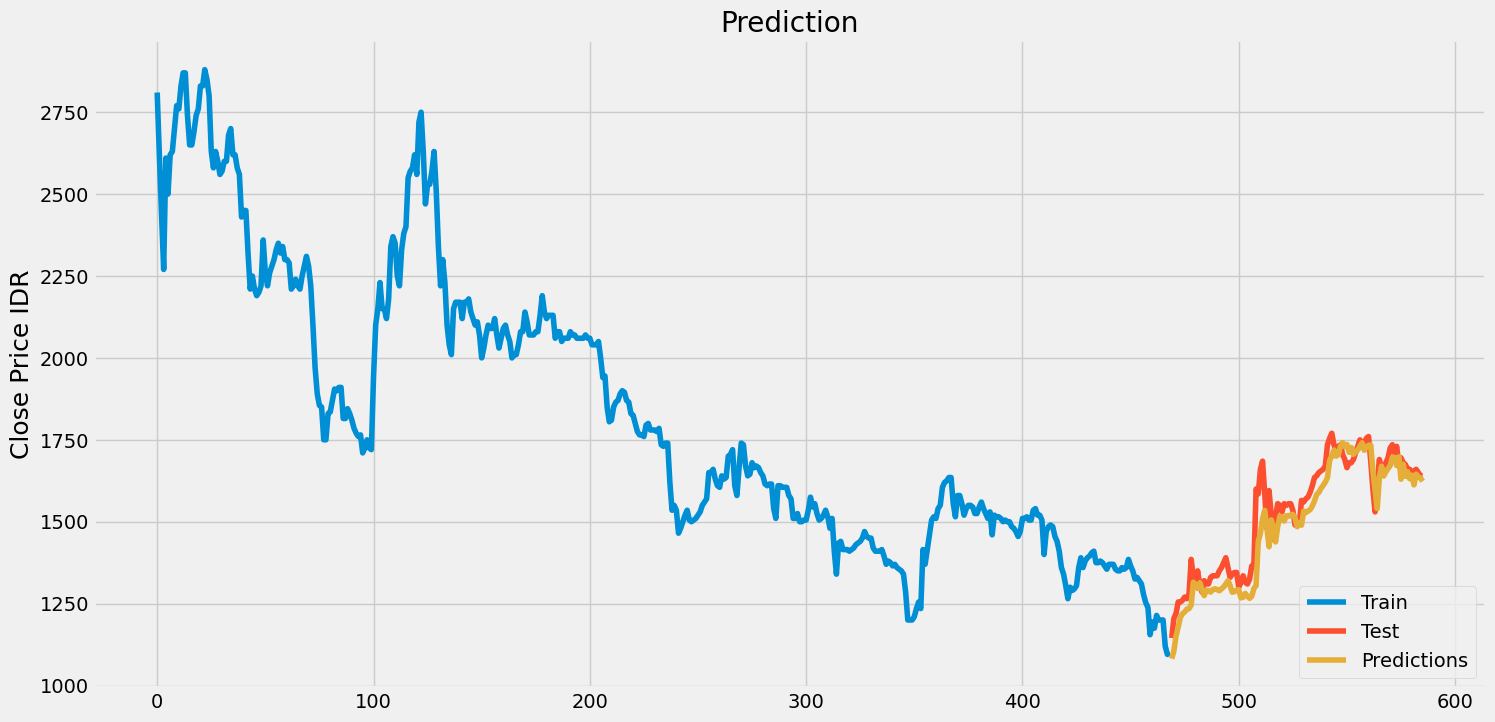

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid predicted prices
valid

,Close,Predictions
469,1145,1081.943115
470,1205,1105.673584
471,1220,1151.198975
472,1255,1178.584351
473,1255,1208.266357
...,...,...
581,1655,1612.406494
582,1660,1645.282471
583,1650,1636.896240
584,1640,1633.438599


In [ ]:
predictions

array([[1081.9431],
       [1105.6736],
       [1151.199 ],
       [1178.5844],
       [1208.2664],
       [1218.9943],
       [1224.754 ],
       [1233.3584],
       [1234.7747],
       [1245.6123],
       [1315.443 ],
       [1307.7651],
       [1296.3945],
       [1313.7007],
       [1292.7206],
       [1274.4746],
       [1290.9385],
       [1289.1244],
       [1285.2433],
       [1292.8927],
       [1295.2518],
       [1292.6445],
       [1289.3452],
       [1295.14  ],
       [1301.0094],
       [1309.81  ],
       [1319.8976],
       [1304.9695],
       [1284.58  ],
       [1286.5707],
       [1291.2214],
       [1292.4738],
       [1267.6592],
       [1269.265 ],
       [1281.2294],
       [1272.5415],
       [1266.197 ],
       [1272.5052],
       [1296.247 ],
       [1305.0725],
       [1438.9718],
       [1464.8494],
       [1508.9343],
       [1534.5646],
       [1480.4222],
       [1423.6145],
       [1505.7264],
       [1479.3253],
       [1438.3196],
       [1485.5078],
